In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data



# Generate dummy data


Using TensorFlow backend.


In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

In [4]:
model = Sequential()
# Dense(256) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(256, activation='relu', input_dim= 784))
#model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#decay=1e-6
sgd = SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train,
          epochs= 10,
          batch_size=20,
          verbose = 1)

Epoch 1/10
55000/55000 [==============================] - 8s 150us/step - loss: 0.5170 - acc: 0.8648
Epoch 2/10
55000/55000 [==============================] - 7s 120us/step - loss: 0.2497 - acc: 0.9286
Epoch 3/10
55000/55000 [==============================] - 7s 121us/step - loss: 0.1979 - acc: 0.9433
Epoch 4/10
55000/55000 [==============================] - 7s 120us/step - loss: 0.1642 - acc: 0.9531
Epoch 5/10
55000/55000 [==============================] - 7s 121us/step - loss: 0.1406 - acc: 0.9597
Epoch 6/10
55000/55000 [==============================] - 7s 121us/step - loss: 0.1217 - acc: 0.9656
Epoch 7/10
55000/55000 [==============================] - 7s 124us/step - loss: 0.1073 - acc: 0.9695
Epoch 8/10
55000/55000 [==============================] - 7s 125us/step - loss: 0.0948 - acc: 0.9733
Epoch 9/10
55000/55000 [==============================] - 7s 131us/step - loss: 0.0851 - acc: 0.9763
Epoch 10/10
55000/55000 [==============================] - 7s 128us/step - loss: 0.0764 - a

In [8]:
score = model.evaluate(x_test, y_test, batch_size= 20)
print("Testing Accuracy: ", score[1])

10000/10000 [==============================] - 0s 47us/step
Testing Accuracy:  0.972799995065


In [6]:
data_path = 'mnist_cluttered_train_data.tfrecords'  # address to save the hdf5 file
gpu_options = tf.GPUOptions(allow_growth=True)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    feature = {'train/image': tf.FixedLenFeature([], tf.string),
               'train/label': tf.FixedLenFeature([], tf.int64)}
   
    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)
    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['train/image'], tf.float32)
    
    # Cast label data into int32
    label = tf.cast(features['train/label'], tf.int32)
    # Reshape image data into the original shape
    image = tf.reshape(image, (60,60))
    
    # Any preprocessing here ...
    
    # Creates batches by randomly shuffling tensors

    train_images = []
    train_labels = []
    # Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(55000):
        img, lbl = sess.run([image, label])
        train_images.append(img)
        train_labels.append(lbl)
    # Stop the threads
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()

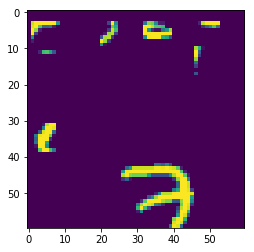

In [8]:
plt.imshow(train_images[0])

In [9]:
data_path = 'mnist_cluttered_test_data.tfrecords'  # address to save the hdf5 file
gpu_options = tf.GPUOptions(allow_growth=True)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    feature = {'test/image': tf.FixedLenFeature([], tf.string),
               'test/label': tf.FixedLenFeature([], tf.int64)}
   
    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)
    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['test/image'], tf.float32)
    
    # Cast label data into int32
    label = tf.cast(features['test/label'], tf.int32)
    # Reshape image data into the original shape
    image = tf.reshape(image, (60,60))
    
    test_images = []
    test_labels = []
# Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(10000):
        img, lbl = sess.run([image, label])
        test_images.append(img)
        test_labels.append(lbl)
    # Stop the threads
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()





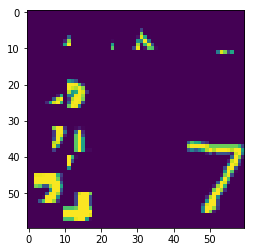

In [11]:
plt.imshow(test_images[0])

In [12]:
flat_train_images = []
for i in range(55000):
    flat_train_images.append(np.reshape(train_images[i], (3600,)))

flat_test_images = []
for i in range(10000):
    flat_test_images.append(np.reshape(test_images[i], (3600,)))
    

In [13]:

onehot_train_labels = np.zeros((55000, 10))
onehot_train_labels[np.arange(55000), train_labels] = 1


onehot_test_labels = np.zeros((10000, 10))
onehot_test_labels[np.arange(10000), test_labels] = 1


In [14]:
onehot_train_labels.shape

(55000, 10)

In [15]:
flat_train_images = np.asarray(flat_train_images)
flat_test_images = np.asarray(flat_test_images)
onehot_train_labels = np.asarray(onehot_train_labels)
onehot_test_labels = np.asarray(onehot_test_labels)

In [16]:
x_train = flat_train_images
y_train = onehot_train_labels
x_test = flat_test_images
y_test = onehot_test_labels

In [24]:
model = Sequential()
# Dense(256) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(256, activation='relu', input_dim= 3600))
#model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#decay=1e-6
sgd = SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [25]:
model.fit(x_train, y_train,
          epochs= 20,
          batch_size=20,
          verbose = 1)

Epoch 1/20
55000/55000 [==============================] - 8s 137us/step - loss: 2.2926 - acc: 0.1332
Epoch 2/20
55000/55000 [==============================] - 8s 140us/step - loss: 2.2129 - acc: 0.1998
Epoch 3/20
55000/55000 [==============================] - 7s 128us/step - loss: 2.1217 - acc: 0.2381
Epoch 4/20
55000/55000 [==============================] - 7s 127us/step - loss: 2.0172 - acc: 0.2861
Epoch 5/20
55000/55000 [==============================] - 7s 128us/step - loss: 1.8874 - acc: 0.3388
Epoch 6/20
55000/55000 [==============================] - 7s 126us/step - loss: 1.7298 - acc: 0.4004
Epoch 7/20
55000/55000 [==============================] - 7s 126us/step - loss: 1.5531 - acc: 0.4645
Epoch 8/20
55000/55000 [==============================] - 7s 122us/step - loss: 1.3702 - acc: 0.5319
Epoch 9/20
55000/55000 [==============================] - 7s 125us/step - loss: 1.1848 - acc: 0.5974
Epoch 10/20
55000/55000 [==============================] - 7s 125us/step - loss: 1.0080 - a

In [27]:
score = model.evaluate(x_test, y_test, batch_size= 20)
print("Testing Accuracy: ", score[1])

10000/10000 [==============================] - 1s 77us/step
Testing Accuracy:  0.34140000205487014


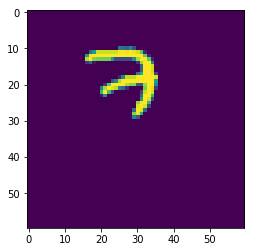

In [28]:
data_path = 'mnist_shifted_train_data.tfrecords'  # address to save the hdf5 file
gpu_options = tf.GPUOptions(allow_growth=True)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    feature = {'train/image': tf.FixedLenFeature([], tf.string),
               'train/label': tf.FixedLenFeature([], tf.int64)}
   
    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)
    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['train/image'], tf.float32)
    
    # Cast label data into int32
    label = tf.cast(features['train/label'], tf.int32)
    # Reshape image data into the original shape
    image = tf.reshape(image, (60,60))
    
    # Any preprocessing here ...
    
    # Creates batches by randomly shuffling tensors

    train_images = []
    train_labels = []
    # Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(55000):
        img, lbl = sess.run([image, label])
        train_images.append(img)
        train_labels.append(lbl)
    # Stop the threads
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()

plt.imshow(train_images[0])

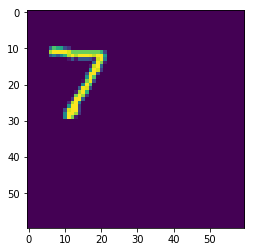

In [29]:
data_path = 'mnist_shifted_test_data.tfrecords'  # address to save the hdf5 file
gpu_options = tf.GPUOptions(allow_growth=True)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    feature = {'test/image': tf.FixedLenFeature([], tf.string),
               'test/label': tf.FixedLenFeature([], tf.int64)}
   
    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)
    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['test/image'], tf.float32)
    
    # Cast label data into int32
    label = tf.cast(features['test/label'], tf.int32)
    # Reshape image data into the original shape
    image = tf.reshape(image, (60,60))
    
    test_images = []
    test_labels = []
# Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(10000):
        img, lbl = sess.run([image, label])
        test_images.append(img)
        test_labels.append(lbl)
    # Stop the threads
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()





plt.imshow(test_images[0])



In [30]:
flat_train_images = []
for i in range(55000):
    flat_train_images.append(np.reshape(train_images[i], (3600,)))

flat_test_images = []
for i in range(10000):
    flat_test_images.append(np.reshape(test_images[i], (3600,)))
    


onehot_train_labels = np.zeros((55000, 10))
onehot_train_labels[np.arange(55000), train_labels] = 1


onehot_test_labels = np.zeros((10000, 10))
onehot_test_labels[np.arange(10000), test_labels] = 1


onehot_train_labels.shape

flat_train_images = np.asarray(flat_train_images)
flat_test_images = np.asarray(flat_test_images)
onehot_train_labels = np.asarray(onehot_train_labels)
onehot_test_labels = np.asarray(onehot_test_labels)



In [31]:
x_train = flat_train_images
y_train = onehot_train_labels
x_test = flat_test_images
y_test = onehot_test_labels



In [32]:
model = Sequential()
# Dense(256) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(256, activation='relu', input_dim= 3600))
#model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#decay=1e-6
sgd = SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [33]:
model.fit(x_train, y_train, epochs= 30, batch_size=20, verbose = 1)

Epoch 1/30
55000/55000 [==============================] - 7s 131us/step - loss: 2.2641 - acc: 0.1622
Epoch 2/30
55000/55000 [==============================] - 7s 134us/step - loss: 2.0965 - acc: 0.2476
Epoch 3/30
55000/55000 [==============================] - 7s 131us/step - loss: 1.9540 - acc: 0.3033
Epoch 4/30
55000/55000 [==============================] - 7s 126us/step - loss: 1.7715 - acc: 0.3880
Epoch 5/30
55000/55000 [==============================] - 7s 124us/step - loss: 1.5015 - acc: 0.4941
Epoch 6/30
55000/55000 [==============================] - 7s 128us/step - loss: 1.2292 - acc: 0.5881
Epoch 7/30
55000/55000 [==============================] - 7s 124us/step - loss: 1.0159 - acc: 0.6626
Epoch 8/30
55000/55000 [==============================] - 7s 130us/step - loss: 0.8577 - acc: 0.7135
Epoch 9/30
55000/55000 [==============================] - 7s 127us/step - loss: 0.7280 - acc: 0.7615
Epoch 10/30
55000/55000 [==============================] - 7s 128us/step - loss: 0.6205 - a

In [34]:

score = model.evaluate(x_test, y_test, batch_size= 20)
print("Testing Accuracy: ", score[1])

10000/10000 [==============================] - 1s 64us/step
Testing Accuracy:  0.7016000008583069
